In [1]:
# import required library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings # filter warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("Heart.csv")
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [3]:
print('No. of rows',data.shape[0])
print('No. of columns',data.shape[1])

No. of rows 1025
No. of columns 14


In [4]:
data.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [6]:
# As we have 14 columns let's sort columns by their datatypes 
data.columns.to_series().groupby(data.dtypes).groups

{int64: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'slope', 'ca', 'thal', 'target'], float64: ['oldpeak']}

**Observation-:**

- In this Heart_disease data we have 14 columns and 1025 rows.
- Here we have Target Variable is "Target".

# Statistical Analysis

**Missing Value Check**

In [11]:
Missing_val = data.isnull().sum().sort_values(ascending = False)
percentage_missing_val = (Missing_val/len(data))*100
print(pd.concat([Missing_val,percentage_missing_val], axis = 1, keys=['Missing_values','%Missing values']))

          Missing_values  %Missing values
age                    0              0.0
sex                    0              0.0
cp                     0              0.0
trestbps               0              0.0
chol                   0              0.0
fbs                    0              0.0
restecg                0              0.0
thalach                0              0.0
exang                  0              0.0
oldpeak                0              0.0
slope                  0              0.0
ca                     0              0.0
thal                   0              0.0
target                 0              0.0


**There is no missing data!! This will make it easier to work with the dataset.**

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [14]:
data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


For Heart disease Age is main factor and mean of Age is 59.3 where sex has .97 Also with respect to health condition we also need to see CP and restecg which have 3.505 and 0.735 Respectively.

# E.D.A

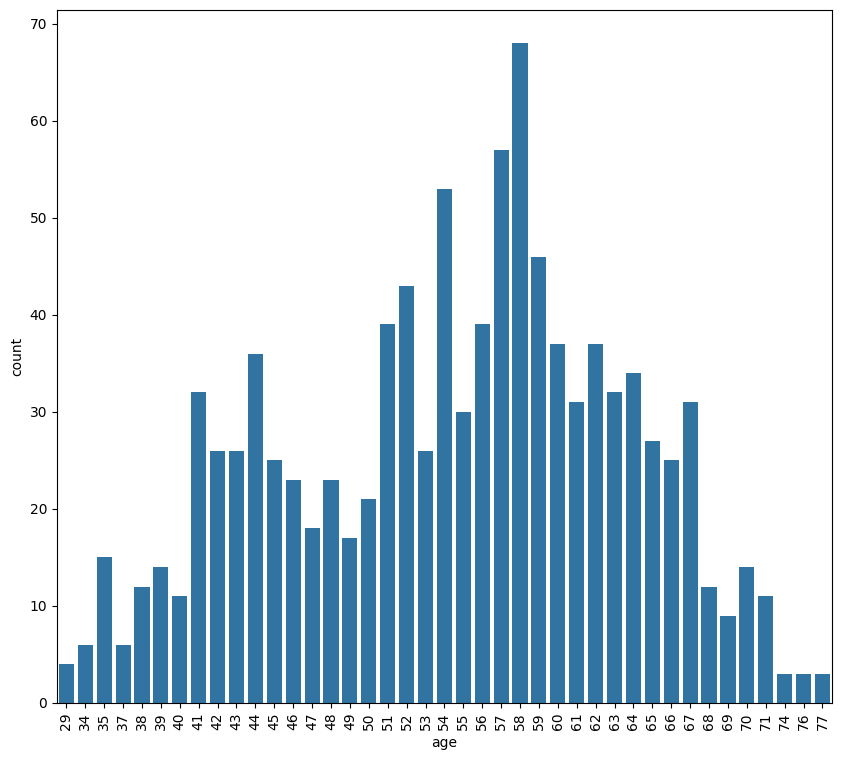

In [17]:
plt.figure(figsize=(10,9))
sns.countplot(x ='age', data=data)
plt.xticks(rotation=90)
plt.show()

In the above graph we can see that age between 51 to 69 has maximum counts for heart disease.

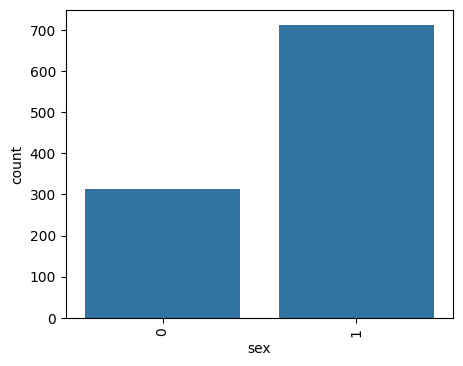

In [19]:
plt.figure(figsize=(5,4))
sns.countplot(x = 'sex',data = data)
plt.xticks(rotation=90)
plt.show()

In [20]:
# we drop CA attribute because it is constant as well as it may not have any impact on our data and then we plots abve graph to see which attributes playing more valueable inputs for our project
data.drop('ca',axis = 1, inplace = True)

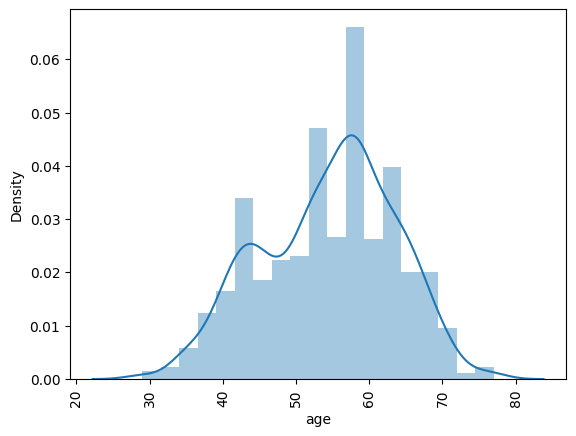

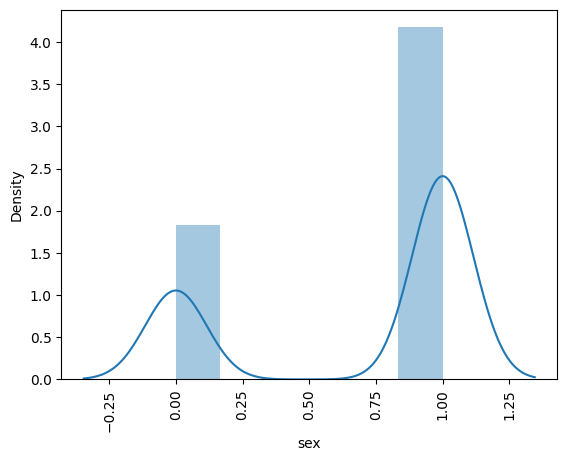

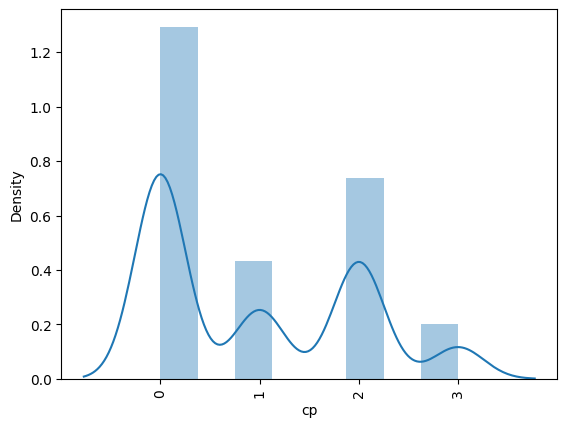

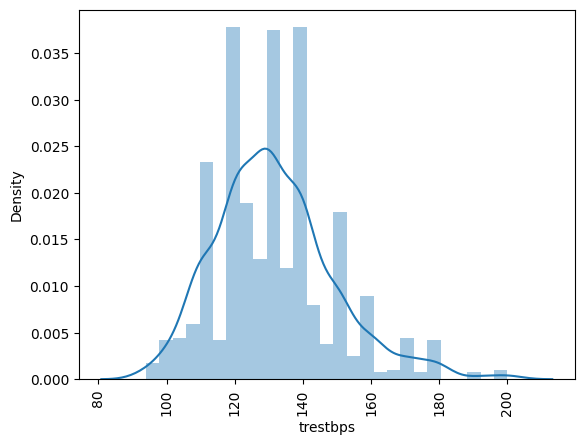

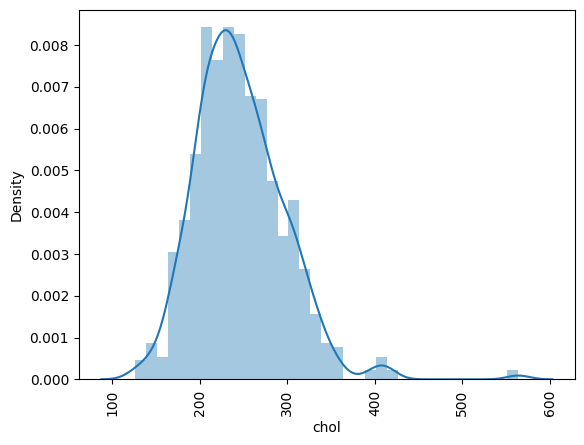

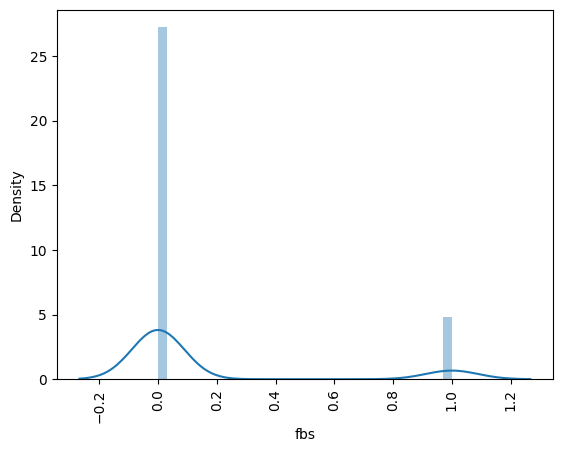

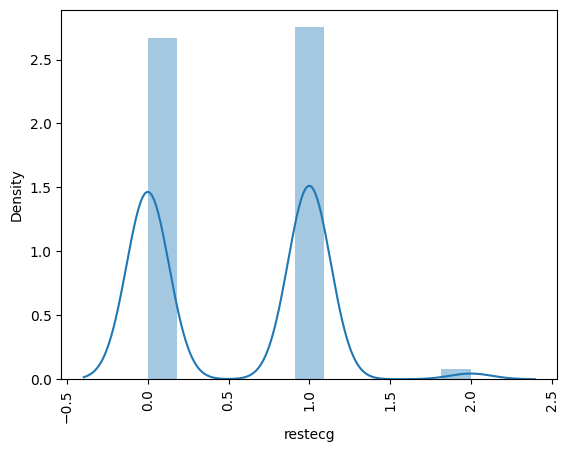

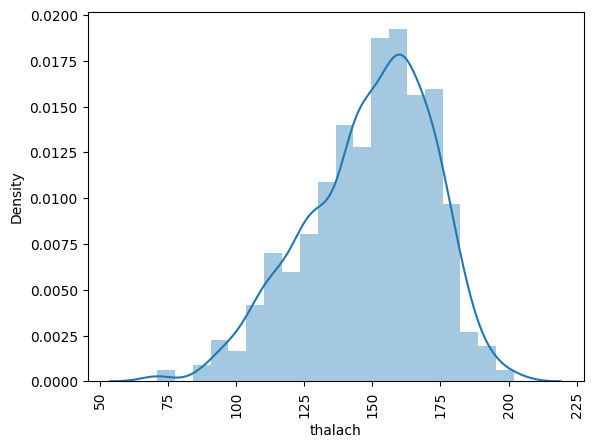

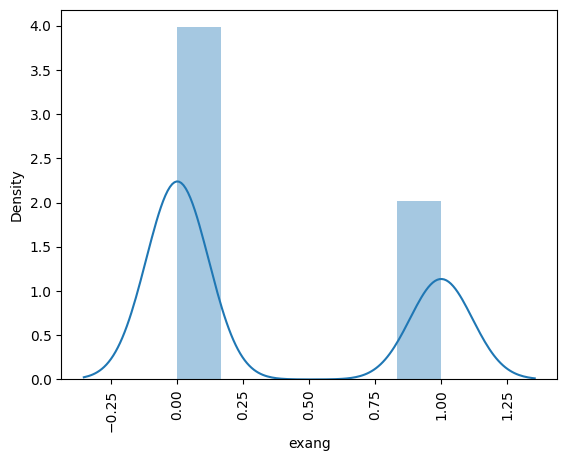

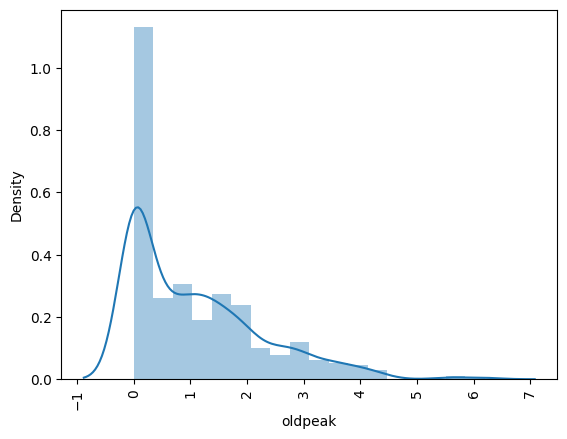

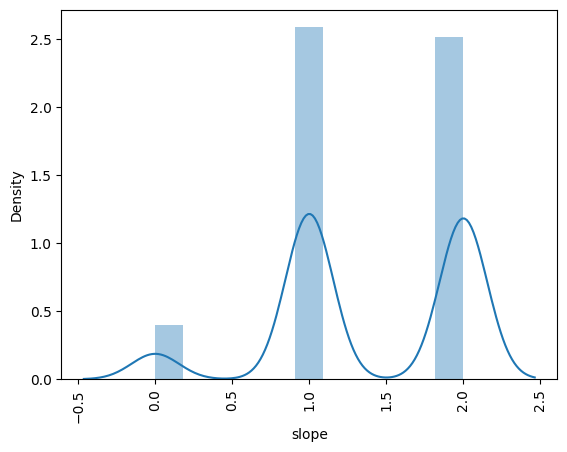

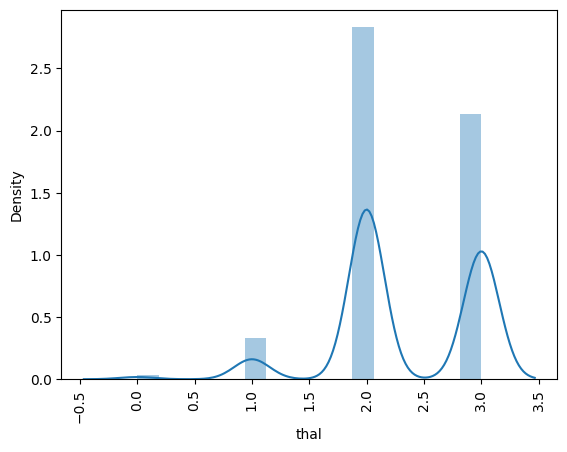

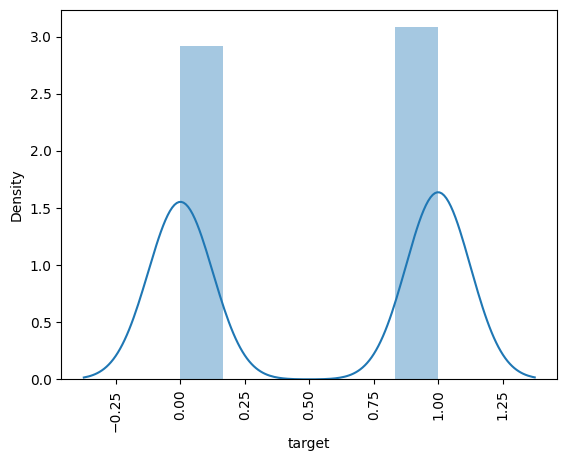

In [21]:
for i in data.describe().columns:
    sns.distplot(data[i])
    plt.xticks(rotation=90)
    plt.show()

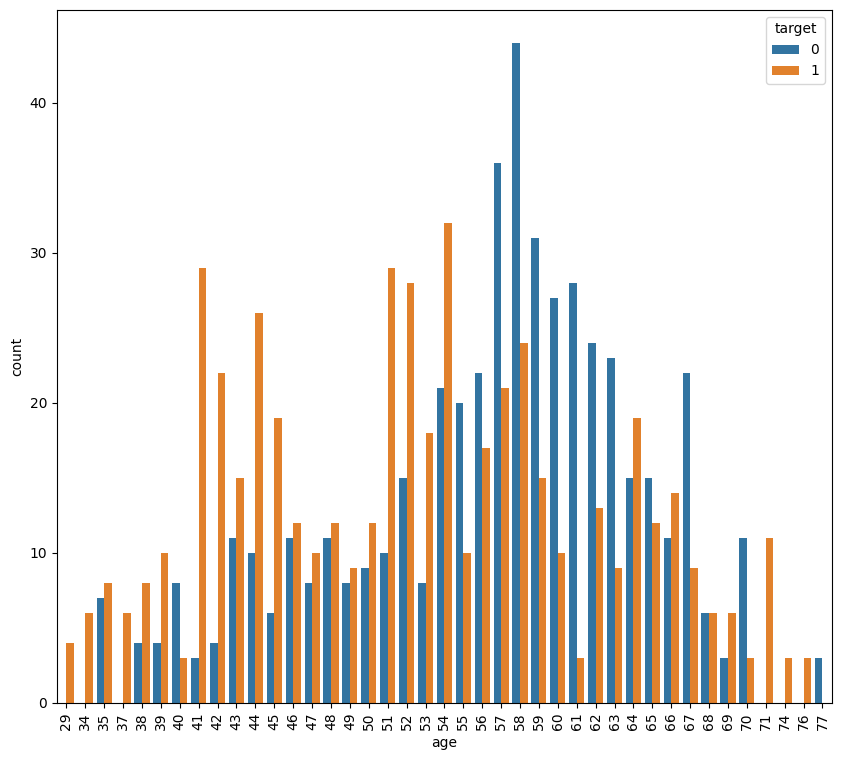

In [22]:
plt.figure(figsize=(10,9))
sns.countplot(x="age",hue="target",data=data)
plt.xticks(rotation=90)
plt.show()

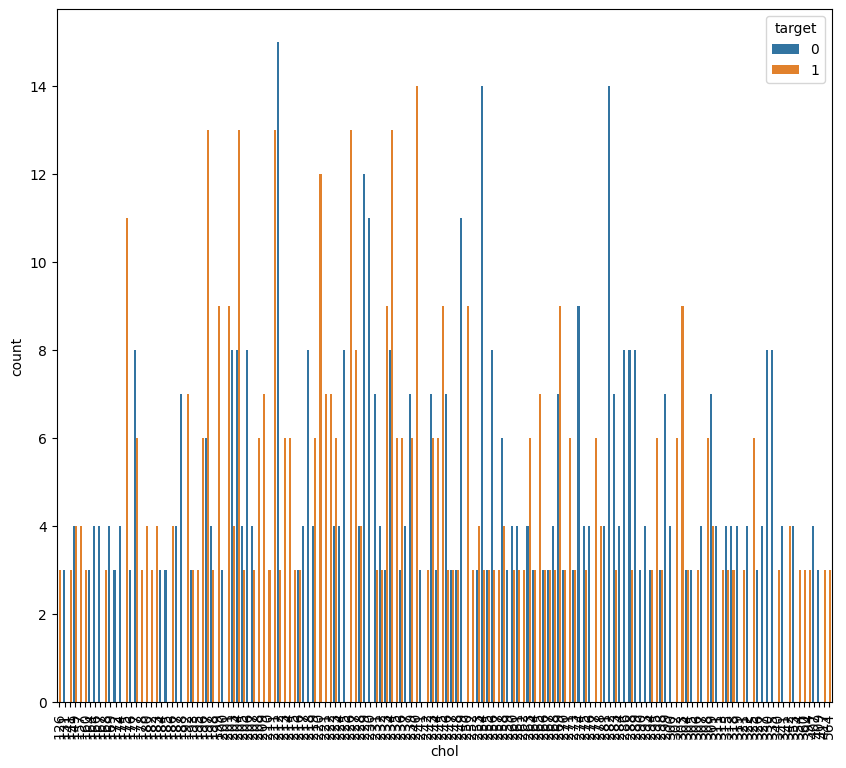

In [23]:
plt.figure(figsize=(10,9))
sns.countplot(x="chol",hue="target",data=data)
plt.xticks(rotation=90)
plt.show()

# Outlier detection and removal

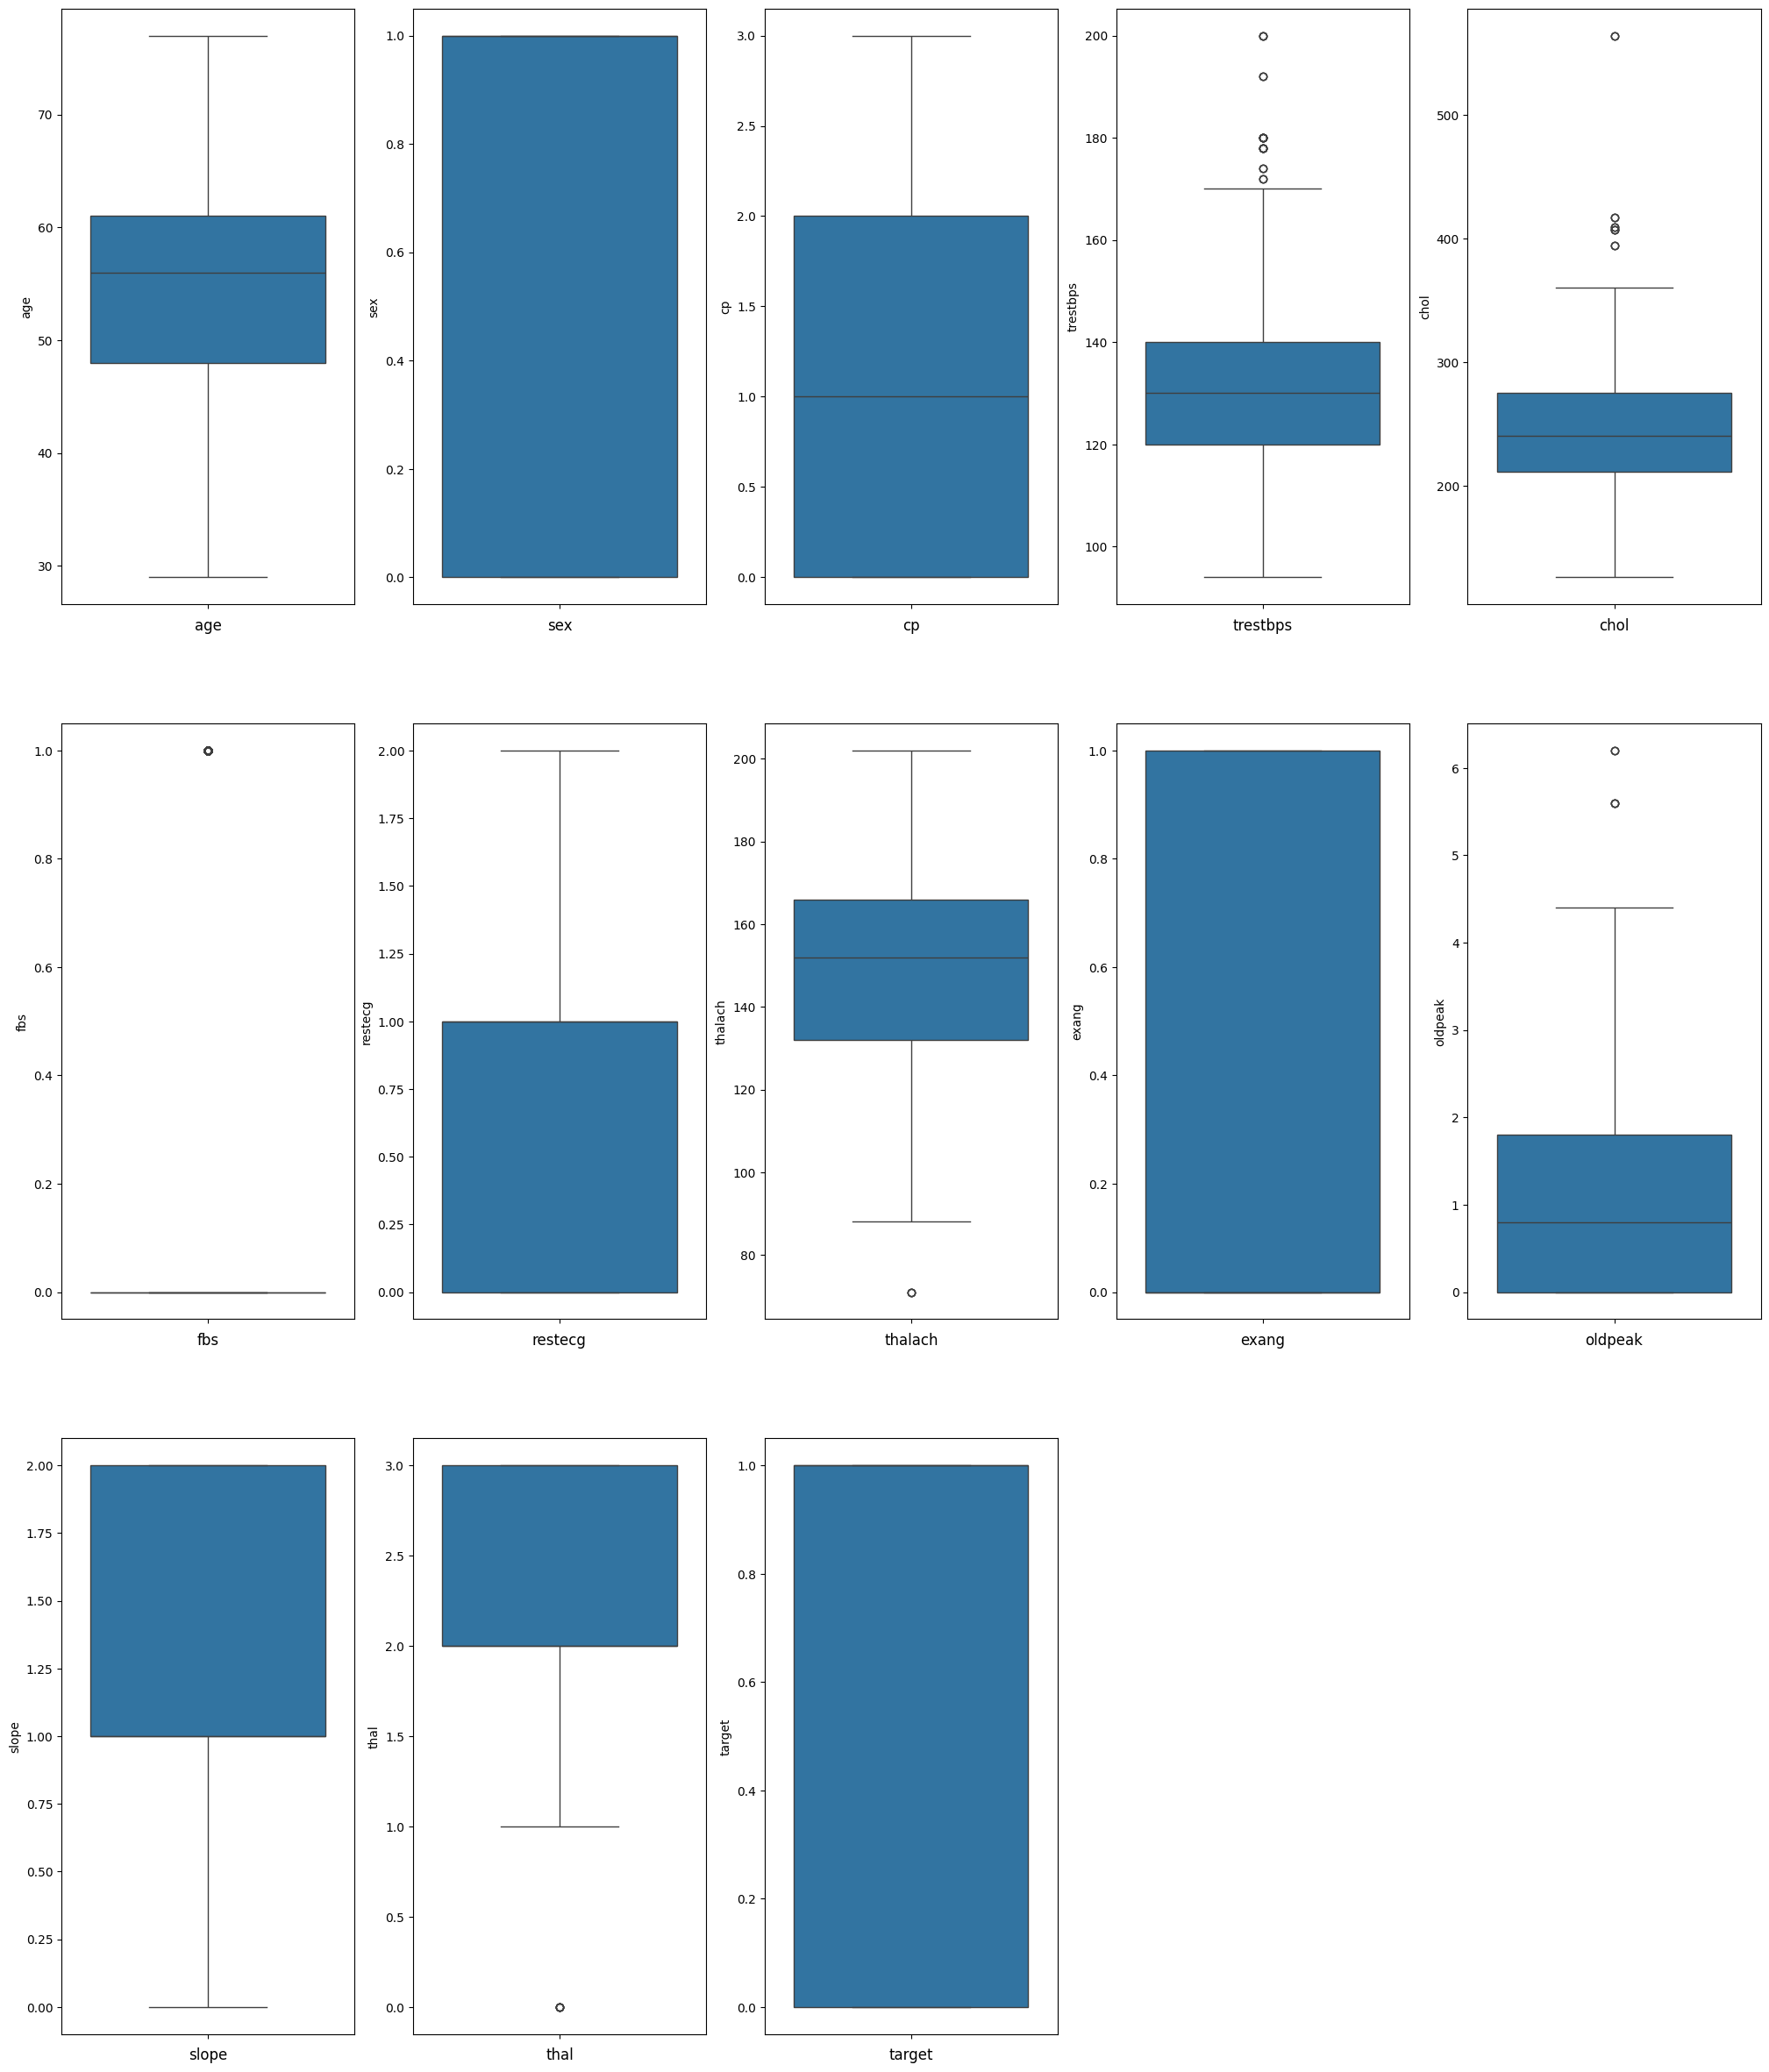

In [25]:
plt.figure(figsize=(25,30), facecolor='white')
plotnumber = 1
for column in data:
    if plotnumber <=14:
        ax = plt.subplot(3,5, plotnumber)
        sns.boxplot(data[column])
        plt.xlabel(column,fontsize = 12)
    plotnumber+=1
plt.show()

# Features Contain Outliers

"trestbps", "chol", "fbs", "oldpeak", "thal", "thalach"

In [28]:
from scipy.stats import zscore
z = np.abs(zscore(data))
threshold = 3
df = data[(z<3).all(axis = 1)]
print("Shape of the dataframe before removing outliers: ",data.shape)
print("Shape of the dataframe after removing outliers: ",df.shape)

Shape of the dataframe before removing outliers:  (1025, 13)
Shape of the dataframe after removing outliers:  (987, 13)


In [29]:
print("Percentage Data Loss",((1025-987)/1025)*100,'%')

Percentage Data Loss 3.7073170731707314 %


In [30]:
data = df.copy()

# Features Selection and Engineering

In [32]:
data.skew()

age        -0.223188
sex        -0.912027
cp          0.511079
trestbps    0.539168
chol        0.263195
fbs         2.032561
restecg     0.157987
thalach    -0.448246
exang       0.703346
oldpeak     0.961833
slope      -0.479968
thal       -0.244981
target     -0.095491
dtype: float64

# Standard Scaling

In [34]:
# Spliting data in target and dependent features
x = data.drop(['target'], axis = 1)
y = data['target']

# Correlation

In [36]:
data.corr()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,thal,target
age,1.000000,-0.087689,-0.069871,0.285750,0.199354,0.125973,-0.125975,-0.394312,0.103974,0.203595,-0.163708,0.063651,-0.230839
sex,-0.087689,1.000000,-0.041614,-0.054547,-0.146734,0.041735,-0.099150,-0.051328,0.139822,0.143459,-0.046811,0.234573,-0.292534
cp,-0.069871,-0.041614,1.000000,0.065950,-0.110109,0.089590,0.051270,0.305830,-0.397195,-0.141827,0.101722,-0.164820,0.416532
trestbps,0.285750,-0.054547,0.065950,1.000000,0.136111,0.164708,-0.096470,-0.059425,0.051859,0.139556,-0.090815,0.019078,-0.110756
chol,0.199354,-0.146734,-0.110109,0.136111,1.000000,0.019634,-0.107886,-0.054753,0.095567,0.051492,-0.010816,0.055425,-0.125458
fbs,0.125973,0.041735,0.089590,0.164708,0.019634,1.000000,-0.106012,-0.015240,0.027677,0.004496,-0.052895,-0.011360,-0.036884
restecg,-0.125975,-0.099150,0.051270,-0.096470,-0.107886,-0.106012,1.000000,0.070240,-0.079447,-0.036557,0.089847,-0.000759,0.141567
thalach,-0.394312,-0.051328,0.305830,-0.059425,-0.054753,-0.015240,0.070240,1.000000,-0.399148,-0.362496,0.393559,-0.127739,0.434344
exang,0.103974,0.139822,-0.397195,0.051859,0.095567,0.027677,-0.079447,-0.399148,1.000000,0.320504,-0.253929,0.219204,-0.438001
oldpeak,0.203595,0.143459,-0.141827,0.139556,0.051492,0.004496,-0.036557,-0.362496,0.320504,1.000000,-0.542167,0.163484,-0.434830


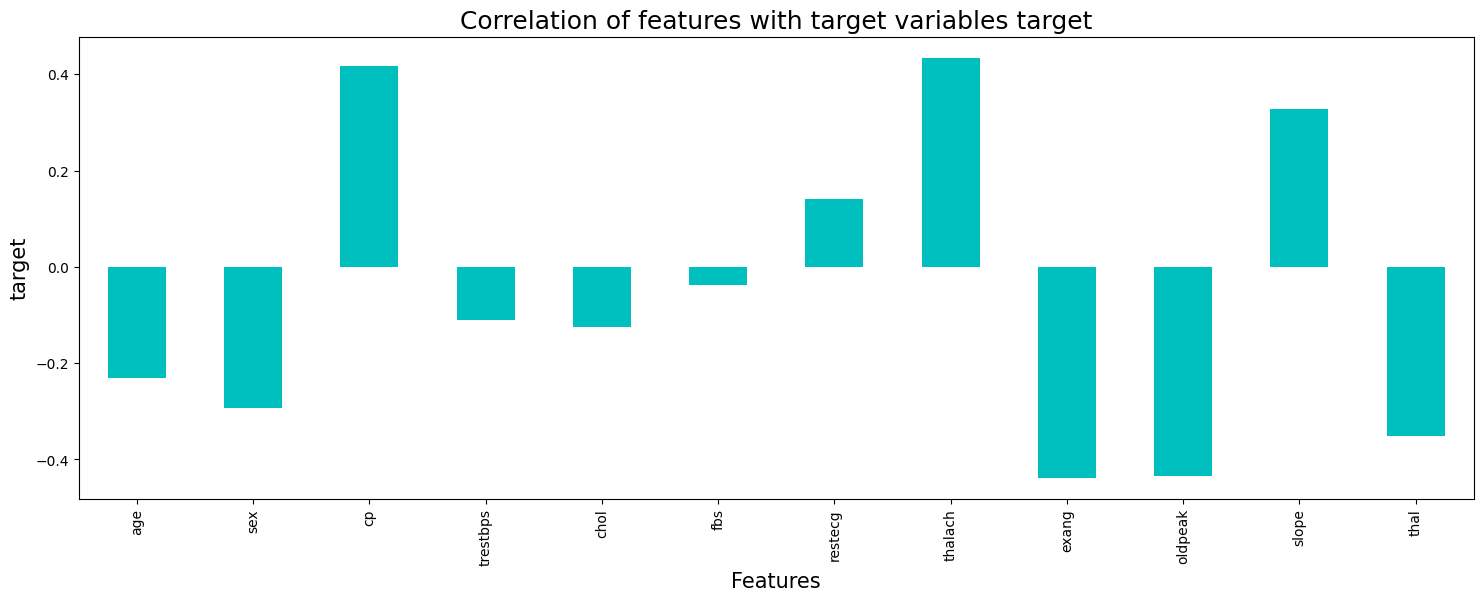

In [37]:
plt.figure(figsize=(18,6))
df.corr()['target'].drop(['target']).plot(kind = 'bar', color = 'c')
plt.xlabel('Features',fontsize = 15)
plt.ylabel('target',fontsize=15)
plt.title('Correlation of features with target variables target',fontsize=18)
plt.show()

# Machine Learning Model Building

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [40]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33, random_state=42)
print('Training feature matrix size:', x_train.shape)
print('Training target vector :',y_train.shape)
print('Test feature matrix size :',x_test.shape)
print('Test target vector size :', y_test.shape)

Training feature matrix size: (661, 12)
Training target vector : (661,)
Test feature matrix size : (326, 12)
Test target vector size : (326,)


# Finding Best random rate

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
maxAccu=0
maxRs=0
for i in range (1,250):
    x_train,x_test,y_train,y_test= train_test_split(x,y,test_size = 0.33, random_state=i)
    lr = LogisticRegression()
    lr.fit(x_train,y_train)
    y_pred=lr.predict(x_test)
    acc = accuracy_score(y_test, y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu, 'on Random_state',maxRS)

Best accuracy is 0.8711656441717791 on Random_state 2


# Logistic Regression

In [44]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=242)
lrr = LogisticRegression()
lrr.fit(x_train,y_train)
y_pred = lrr.predict(x_test)
print("Logistic Regression Evaluation")
print('\n')
print("Accuracy Score Of Logistic Regression : ",accuracy_score(y_test,y_pred))
print("Confusion Matrix Of Logistic Regression : ",confusion_matrix(y_test,y_pred))
print("Classification Report Of Logistic Regression : ", classification_report(y_test,y_pred))

Logistic Regression Evaluation


Accuracy Score Of Logistic Regression :  0.8251533742331288
Confusion Matrix Of Logistic Regression :  [[118  34]
 [ 23 151]]
Classification Report Of Logistic Regression :                precision    recall  f1-score   support

           0       0.84      0.78      0.81       152
           1       0.82      0.87      0.84       174

    accuracy                           0.83       326
   macro avg       0.83      0.82      0.82       326
weighted avg       0.83      0.83      0.82       326



# Cross Validation Score

In [46]:
from sklearn.model_selection import cross_val_score
cv_score = cross_val_score(lrr, x,y,cv=5)
print("Cross Validation Score",lrr)
print("CVS Score : ", cv_score)
print("Mean CVS Score : ", cv_score.mean())
print("Std Deviation : ",cv_score.std())

Cross Validation Score LogisticRegression()
CVS Score :  [0.87373737 0.83333333 0.82233503 0.81218274 0.79187817]
Mean CVS Score :  0.8266933292314004
Std Deviation :  0.027198819422497567


# Apply Other Classification Algorithm

In [48]:
models =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]

for m in models:
    m.fit(x_train,y_train)
    y_pred=m.predict(x_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' + '\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :' + '\033[0m\n',accuracy_score(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Confusion Matrix' + '\033[0m \n',confusion_matrix(y_test,y_pred))
    print('\n')
    print('\033[1m'+'Classification Report' + '\033[0m \n',classification_report(y_test,y_pred))
    print('\n')
    print('===================================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.6840490797546013


Confusion Matrix 
 [[ 88  64]
 [ 39 135]]


Classification Report 
               precision    recall  f1-score   support

           0       0.69      0.58      0.63       152
           1       0.68      0.78      0.72       174

    accuracy                           0.68       326
   macro avg       0.69      0.68      0.68       326
weighted avg       0.69      0.68      0.68       326



Classification ML Algorithm Evaluation Matrix DecisionTreeClassifier() is


Accuracy Score :
 1.0


Confusion Matrix 
 [[152   0]
 [  0 174]]


Classification Report 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       152
           1       1.00      1.00      1.00       174

    accuracy                           1.00       326
   macro avg       1.00      1.00      1.00       326
weighted avg       1.00      1.00      1.00       326



Classifica

# Cross Validation

In [50]:
from sklearn.model_selection import cross_val_score
model =[
    SVC(),
    DecisionTreeClassifier(),
    KNeighborsClassifier(n_neighbors=12),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),
    BaggingClassifier()]
for c in model:
    score = cross_val_score(c,x,y, cv=5)
    print('\n')
    print('\033[1m'+'Cross Validation Score',c,'is' + '\033[0m')
    print("Score",score)
    print("Mean Score :",score.mean())
    print("Std Deviation", score.std())
    print('\n')
    print('=====================================================================================================================')



Cross Validation Score SVC() is
Score [0.72727273 0.74242424 0.70558376 0.67005076 0.69543147]
Mean Score : 0.708152591908937
Std Deviation 0.02514080705826616




Cross Validation Score DecisionTreeClassifier() is
Score [0.98484848 1.         0.96954315 1.         1.        ]
Mean Score : 0.9908783264113215
Std Deviation 0.012175086431567866




Cross Validation Score KNeighborsClassifier(n_neighbors=12) is
Score [0.70707071 0.71717172 0.78680203 0.70050761 0.64467005]
Mean Score : 0.7112444239347793
Std Deviation 0.045406895659900685




Cross Validation Score RandomForestClassifier() is
Score [1.         1.         0.98477157 0.98477157 0.98477157]
Mean Score : 0.9908629441624365
Std Deviation 0.007460374851116301




Cross Validation Score AdaBoostClassifier() is
Score [0.88888889 0.84848485 0.91878173 0.85279188 0.82233503]
Mean Score : 0.8662564733630724
Std Deviation 0.0337560304321997




Cross Validation Score GradientBoostingClassifier() is
Score [0.95959596 0.94949495 0.95

# Hyper Parameter Tunning: GridSearchCV

In [52]:
from sklearn.model_selection import GridSearchCV

In [53]:
param = [{'n_estimators':[5,10,15,25,50,100],
         'criterion':['gini','entropy'],
         'max_depth':[5,10,20,40,50,None],
         'max_features':['auto','log2'],
          'bootstrap':[True]
         }]

In [54]:
gc = GridSearchCV(RandomForestClassifier(),param,cv = 5, n_jobs = -1,verbose=5)
gc.fit(x_train,y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid=[{'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                          'max_depth': [5, 10, 20, 40, 50, None],
                          'max_features': ['auto', 'log2'],
                          'n_estimators': [5, 10, 15, 25, 50, 100]}],
             verbose=5)

In [55]:
gc.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 10,
 'max_features': 'log2',
 'n_estimators': 50}

# Final Model

In [57]:
final = RandomForestClassifier(bootstrap = True ,criterion= 'entropy', max_depth = 40 , max_features = 'log2', n_estimators = 15)
final.fit(x_train,y_train)
y_pred = final.predict(x_test)
print(" Final Random Forest Classifier Evaluation")
print('\n')
print("Accuracy Score Of Random Forest Classifier : ",accuracy_score(y_test,y_pred))

 Final Random Forest Classifier Evaluation


Accuracy Score Of Random Forest Classifier :  1.0


# Saving Model

In [59]:
import joblib
joblib.dump(final,"Heart_Disease")

['Heart_Disease']